# Overview: Work Sample - Omkar Pathak

The below is my implementation of several price and volume-based technical indicators for the given equity data. I implemented indicators with the objective of getting a broad overview of trends in the price/volume/volatility of the given equities. Insights obtained from the indicators are also given below the visualization of each indicator. The first part of this analysis is data cleaning and visualization of the equity prices and volumes over time as a reference.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Data + Visualization

In [2]:
df = pd.read_csv('TradingIntern.WS.data.csv')

In [3]:
df.drop(columns = {'Unnamed: 0'}, axis=1)

,symbol,datetime,volume,midpoint
0,FAST,2022-03-01 9:45:00,158430.2,51.505
1,FAST,2022-03-01 10:00:00,337332.3,51.380
2,FAST,2022-03-01 10:15:00,292177.5,51.620
3,FAST,2022-03-01 10:30:00,97747.0,51.575
4,FAST,2022-03-01 10:45:00,101527.2,51.160
...,...,...,...,...
5975,SPCE,2022-03-31 15:00:00,113536.0,10.055
5976,SPCE,2022-03-31 15:15:00,335403.4,9.985
5977,SPCE,2022-03-31 15:30:00,206569.4,9.965
5978,SPCE,2022-03-31 15:45:00,378415.0,9.935


In [4]:
# Converting 'datetime' column to Python 'datetime64[ns]' type
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0      2022-03-01 09:45:00
1      2022-03-01 10:00:00
2      2022-03-01 10:15:00
3      2022-03-01 10:30:00
4      2022-03-01 10:45:00
               ...        
5975   2022-03-31 15:00:00
5976   2022-03-31 15:15:00
5977   2022-03-31 15:30:00
5978   2022-03-31 15:45:00
5979   2022-03-31 16:00:00
Name: datetime, Length: 5980, dtype: datetime64[ns]

Text(0, 0.5, 'Midpoint')

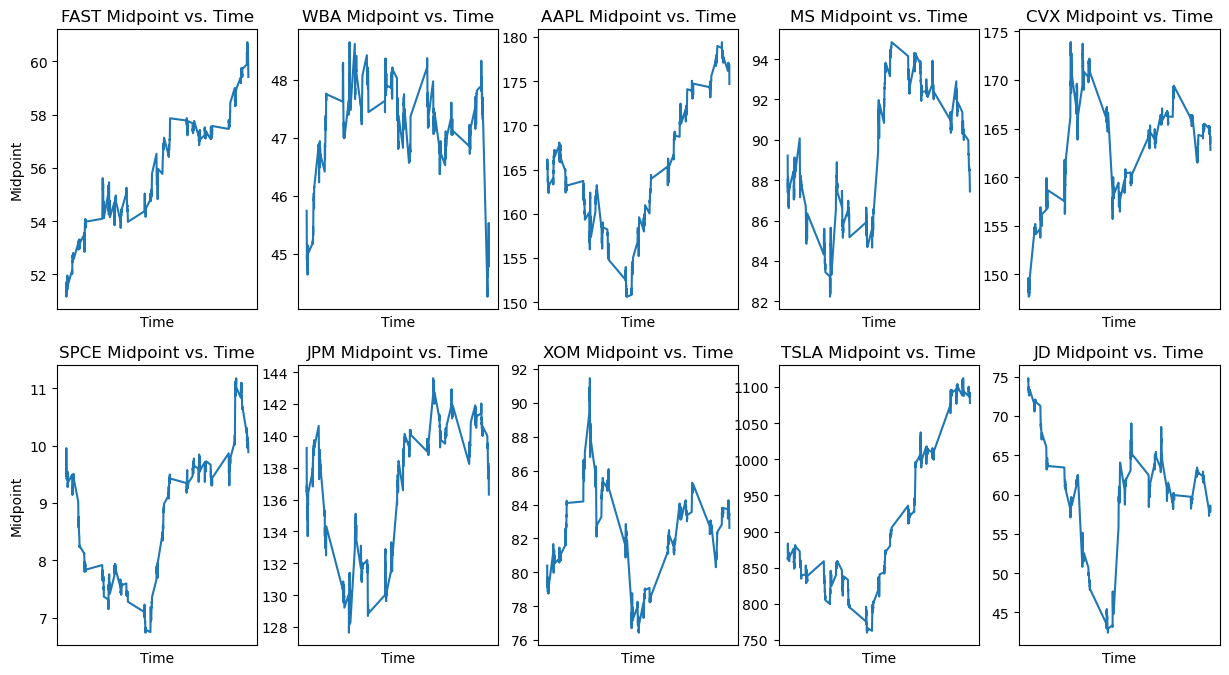

In [5]:
# Plotting midpointt prices for each stock
stocks = list(df['symbol'].unique())

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
i = 0

for stock in stocks:
    x = df['datetime'].loc[df['symbol'] == stock]
    y = df['midpoint'].loc[df['symbol'] == stock]

    if i < 5:
        axs[0, i].plot(x, y)
        axs[0, i].set_title(stock + " Midpoint vs. Time")
        axs[0, i].set_xticks([])
    else:
        axs[1, (i+1)%5].plot(x, y)
        axs[1, (i+1)%5].set_title(stock + " Midpoint vs. Time")
        axs[1, (i+1)%5].set_xticks([])
    i += 1


for ax in axs.flat:
    ax.set(xlabel='Time')

axs[0, 0].set_ylabel('Midpoint') 
axs[1, 0].set_ylabel('Midpoint') 

Text(0, 0.5, 'Volume')

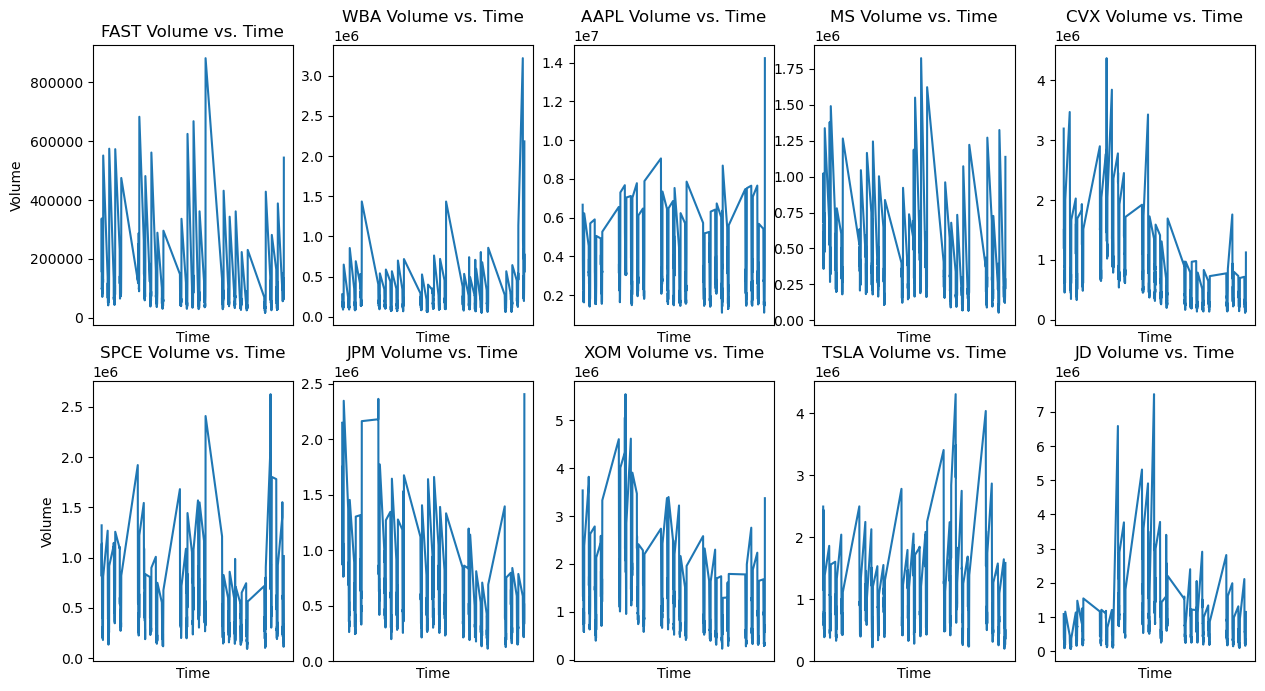

In [6]:
# PLotting volumes for each stock
stocks = list(df['symbol'].unique())

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
i = 0

for stock in stocks:
    x = df['datetime'].loc[df['symbol'] == stock]
    y = df['volume'].loc[df['symbol'] == stock]

    if i < 5:
        axs[0, i].plot(x, y)
        axs[0, i].set_title(stock + " Volume vs. Time")
        axs[0, i].set_xticks([])
    else:
        axs[1, (i+1)%5].plot(x, y)
        axs[1, (i+1)%5].set_title(stock + " Volume vs. Time")
        axs[1, (i+1)%5].set_xticks([])
    i += 1


for ax in axs.flat:
    ax.set(xlabel='Time')

axs[0, 0].set_ylabel('Volume') 
axs[1, 0].set_ylabel('Volume') 

# Moving Averages

In [16]:
# Using exponentially-weighted moving average (EMA) at different spans (2 days, 5 days)
def EMA(stock, span):
    ema = df['midpoint'].loc[df['symbol']==stock].ewm(span=span).mean()
    return ema

Text(0, 0.5, 'Price')

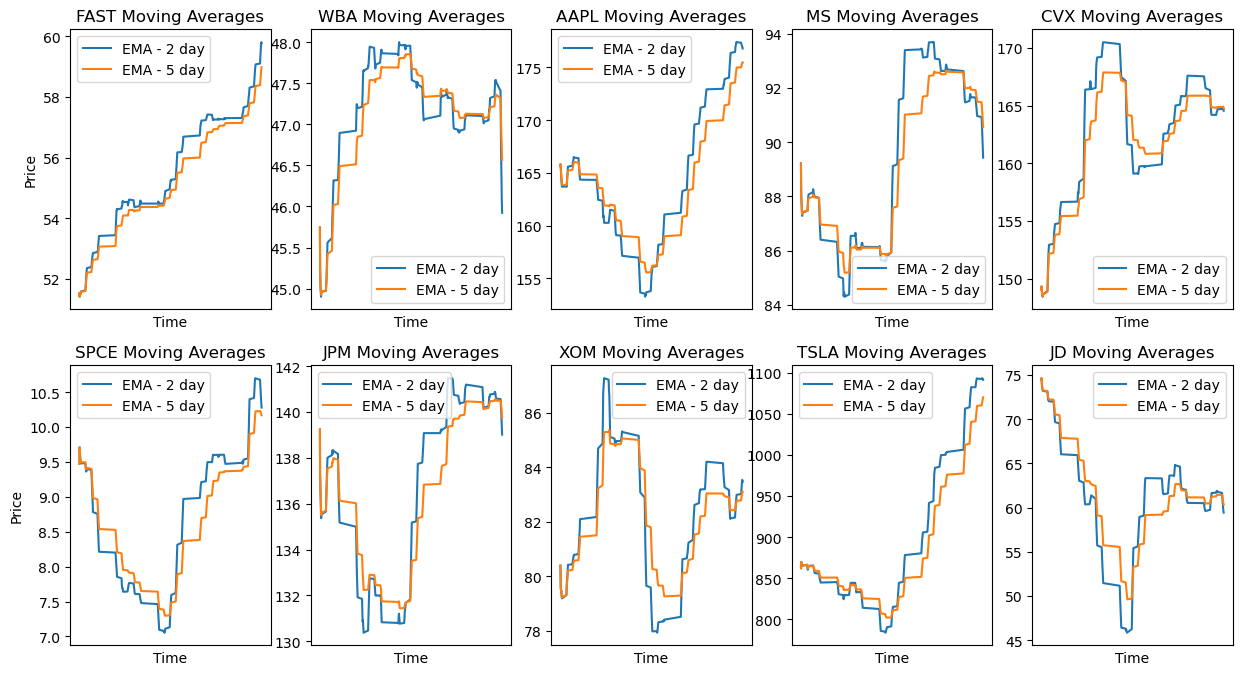

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
i = 0

for stock in stocks:
    ema_2 = EMA(stock, 52)
    ema_5 = EMA(stock, 130)
    price = df['midpoint'].loc[df['symbol'] == stock]
    x = df['datetime'].loc[df['symbol'] == stock]

    if i < 5:
        axs[0, i].plot(x, ema_2, label="EMA - 2 day")
        axs[0, i].plot(x, ema_5, label="EMA - 5 day")
        axs[0, i].set_title(stock + " Moving Averages")
        axs[0, i].set_xticks([])
        axs[0, i].legend()
    else:
        axs[1, (i+1)%5].plot(x, ema_2, label="EMA - 2 day")
        axs[1, (i+1)%5].plot(x, ema_5, label="EMA - 5 day")
        axs[1, (i+1)%5].set_title(stock + " Moving Averages")
        axs[1, (i+1)%5].set_xticks([])
        axs[1, (i+1)%5].legend()
    i += 1


for ax in axs.flat:
    ax.set(xlabel='Time')

axs[0, 0].set_ylabel('Price') 
axs[1, 0].set_ylabel('Price') 


Shorter moving averages (the 2-day EMA in this case) and longer moving averages (the 5-day EMA in this case) can be interpreted as follows: upward momentum in the stock's price if the short-term moving average crosses above a long-term moving average and downward momentum if the short-term moving average crosses below a long-term moving average.

# On-Balance Volume

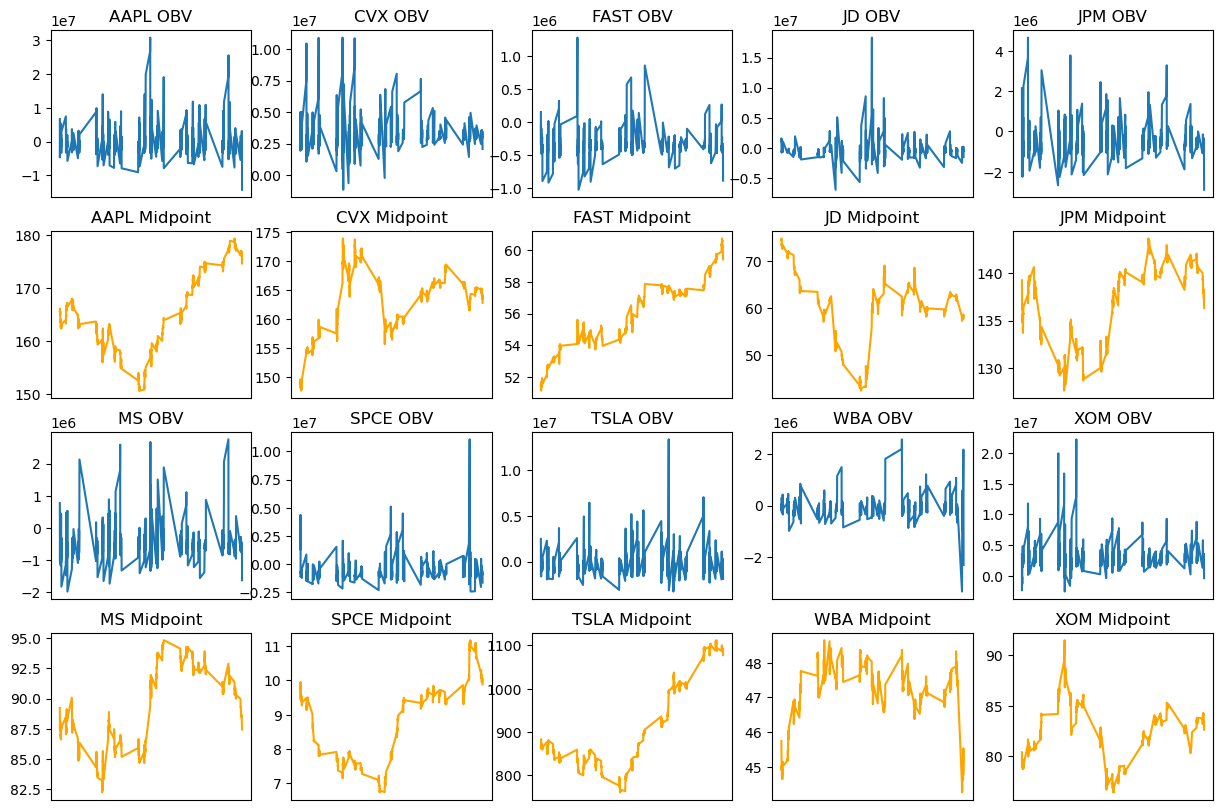

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
i = 0

df_sorted = df.sort_values(by=['symbol', 'datetime'])

for symbol, data in df_sorted.groupby('symbol'):
    group = data.copy()
    group['OBV'] = 0
    group.reset_index(inplace=True)

    for index, row in group.iterrows():
        if index == 0:
            group.at[index, 'OBV'] = row['volume']
        else:
            if group.iloc[index]['midpoint'] > group.iloc[index-1]['midpoint']:
                group.at[index, 'OBV'] = row['volume'] = group.iloc[index-1]['OBV'] + group.iloc[index]['volume']
            elif group.iloc[index]['midpoint'] < group.iloc[index-1]['midpoint']:
                group.at[index, 'OBV'] = row['volume'] = group.iloc[i-1]['OBV'] - group.iloc[index]['volume']
            else:
                group.at[index, 'OBV'] = row['volume'] = group.iloc[i-1]['OBV']
                
    x = group['datetime']
    obv = group['OBV']
    price = group['midpoint']
    
    if i < 5:
        axs[0, i].plot(x, obv)
        axs[0, i].set_title(symbol + " OBV")
        axs[0, i].set_xticks([])

        axs[1, i].plot(x, price, color='orange')
        axs[1, i].set_xticks([])
        axs[1, i].set_title(symbol + " Midpoint")
    else:
        axs[2, i%5].plot(x, obv)
        axs[2, i%5].set_title(symbol + " OBV")
        axs[2, i%5].set_xticks([])

        axs[3, i%5].plot(x, price, color='orange')
        axs[3, i%5].set_xticks([])
        axs[3, i%5].set_title(symbol + " Midpoint")
    i += 1

On-balance volume data can be interpreted as follows: an increasing OBV and price may indicate increased buying pressure for the stock, whereas a decreasing OBV and price may indicate increased selling pressure; significant changes in buying/selling may lead to significant price changes.

# Average Directional Index

In [10]:
def adx(daily_prices, period):
    daily_prices['high_low'] = daily_prices['high'] - daily_prices['low']
    daily_prices['high_close'] = abs(daily_prices['high'] - daily_prices['close'].shift(1))
    daily_prices['low_close'] = abs(daily_prices['high'] - daily_prices['close'].shift(1))
    
    daily_prices['TR'] = daily_prices[['high_low', 'high_close', 'low_close']].max(axis=1)

    daily_prices['+DM'] = daily_prices['high'] - daily_prices['high'].shift(1)
    daily_prices['-DM'] = daily_prices['low'].shift(1) - daily_prices['low']

    daily_prices['+DM'] = daily_prices['+DM'].where((daily_prices['+DM'] > 0) & (daily_prices['+DM'] > daily_prices['-DM']), 0)
    daily_prices['-DM'] = daily_prices['-DM'].where((daily_prices['-DM'] > 0) & (daily_prices['-DM'] > daily_prices['+DM']), 0)

    # Smoothed TR, +DM, and -DM (exponential moving average over the period)
    daily_prices['TR_smooth'] = daily_prices['TR'].rolling(window=period).mean()
    daily_prices['+DM_smooth'] = daily_prices['+DM'].rolling(window=period).mean()
    daily_prices['-DM_smooth'] = daily_prices['-DM'].rolling(window=period).mean()

    # +DI and -DI
    daily_prices['+DI'] = 100 * (daily_prices['+DM_smooth'] / daily_prices['TR_smooth'])
    daily_prices['-DI'] = 100 * (daily_prices['-DM_smooth'] / daily_prices['TR_smooth'])

    # DX (Directional Index)
    daily_prices['DX'] = 100 * (abs(daily_prices['+DI'] - daily_prices['-DI']) / (daily_prices['+DI'] + daily_prices['-DI']))

    # ADX (smooth DX over the period)
    daily_prices['ADX'] = daily_prices['DX'].rolling(window=3).mean()

    return pd.concat([daily_prices['date'], daily_prices['ADX'], daily_prices['+DI'], daily_prices['-DI']], axis=1)

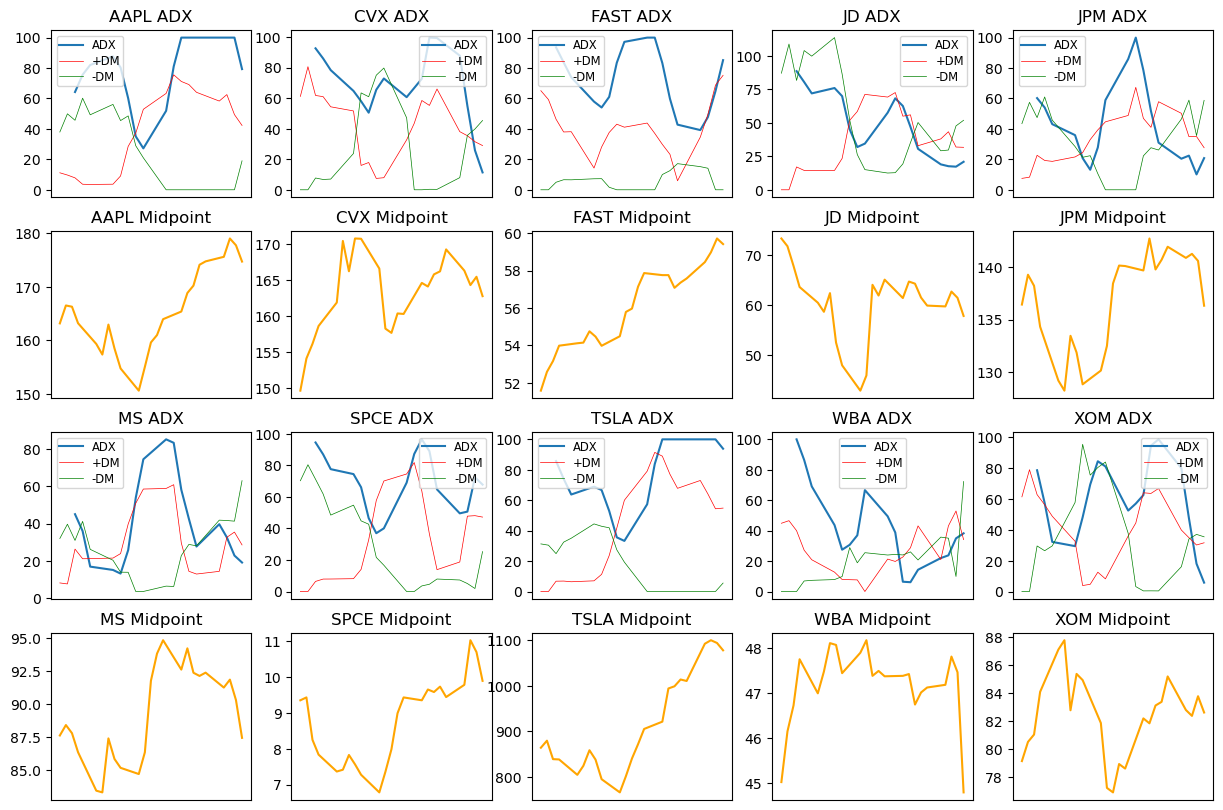

In [11]:
lookback = 5
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
i = 0

for symbol, data in df_sorted.groupby('symbol'):
    data['date'] = data['datetime'].dt.date
    daily_prices = data.groupby('date').agg(
        high=('midpoint', 'max'),     # Highest price of the day
        low=('midpoint', 'min'),      # Lowest price of the day
        close=('midpoint', lambda x: x.iloc[-1])  # Price at 4pm (last value of the day)
    ).reset_index()

    
    result = adx(daily_prices, lookback)
    adx_values = result['ADX']
    di_plus = result['+DI']
    di_minus = result['-DI']
    x = result['date']
    price = daily_prices['close']
    
    if i < 5:
        axs[0, i].plot(x, adx_values, label="ADX")
        axs[0, i].set_title(symbol + " ADX")
        axs[0, i].plot(x, di_plus, color='red', linewidth=0.5, label="+DM")
        axs[0, i].plot(x, di_minus, color='green', linewidth=0.5, label="-DM")
        axs[0, i].set_xticks([])
        axs[0, i].legend(fontsize='small', borderpad=0.25, labelspacing=0.25)

        axs[1, i].plot(x, price, color='orange')
        axs[1, i].set_xticks([])
        axs[1, i].set_title(symbol + " Midpoint")
    else:
        axs[2, i%5].plot(x, adx_values, label="ADX")
        axs[2, i%5].plot(x, di_plus, color='red', linewidth=0.5, label="+DM")
        axs[2, i%5].plot(x, di_minus, color='green', linewidth=0.5, label="-DM")
        axs[2, i%5].set_title(symbol + " ADX")
        axs[2, i%5].set_xticks([])
        axs[2, i%5].legend(fontsize='small', borderpad=0.25, labelspacing=0.25)

        axs[3, i%5].plot(x, price, color='orange')
        axs[3, i%5].set_xticks([])
        axs[3, i%5].set_title(symbol + " Midpoint")
    i += 1

The ADX, along with the +DM (positive 

# Bollinger Bands

In [12]:
def middle_band(stock, span):
    middle_band = df['midpoint'].loc[df['symbol']==stock].rolling(window=span).mean()
    return middle_band

def upper_band(stock, span):
    upper_band = middle_band(stock, span) + 2 * df['midpoint'].loc[df['symbol']==stock].rolling(window=span).std()
    return upper_band

def lower_band(stock, span):
    lower_band = middle_band(stock, span) - 2 * df['midpoint'].loc[df['symbol']==stock].rolling(window=span).std()
    return lower_band

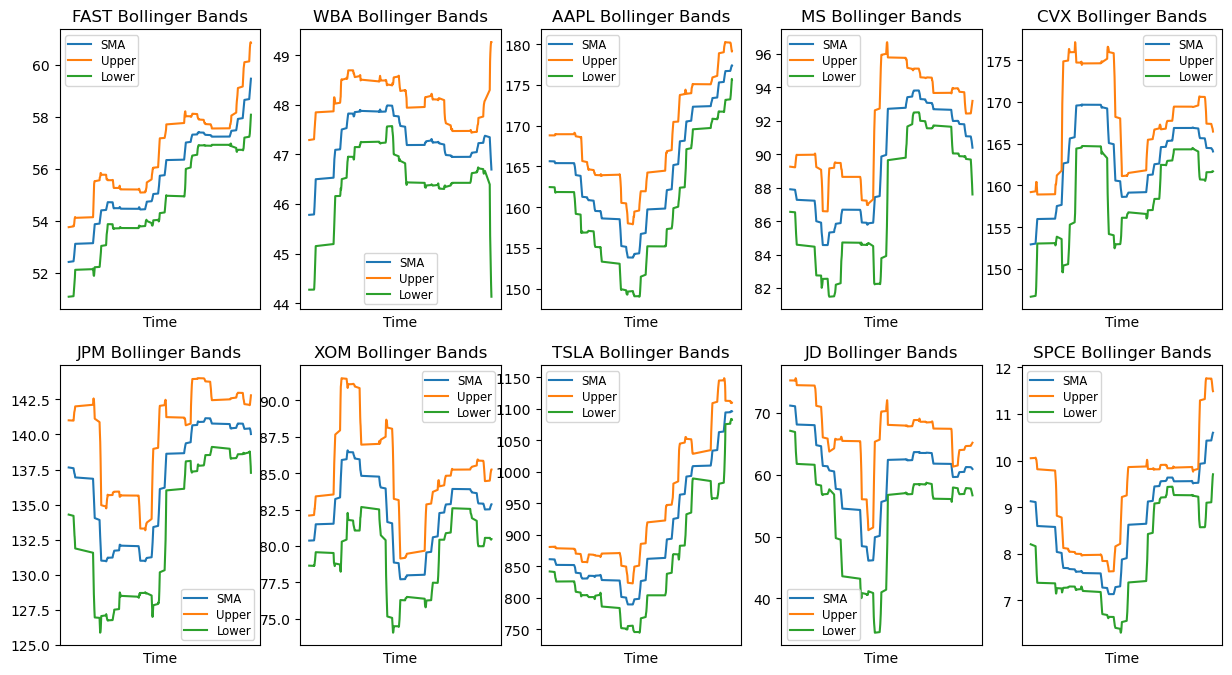

In [13]:
stocks = list(df['symbol'].unique())

fig, axs = plt.subplots(2, 5, figsize=(15, 8))
i = 0
span=78

for stock in stocks:
    x = df['datetime'].loc[df['symbol'] == stock]
    middle = middle_band(stock, 78)
    upper = upper_band(stock, 78)
    lower = lower_band(stock, 78)

    if i < 5:
        axs[0, i].plot(x, middle, label="SMA")
        axs[0, i].plot(x, upper, label="Upper")
        axs[0, i].plot(x, lower, label="Lower")
        axs[0, i].set_title(stock + " Bollinger Bands")
        axs[0, i].set_xticks([])
        axs[0, i].legend(fontsize='small', borderpad=0.25, labelspacing=0.25)
    else:
        axs[1, i%5].plot(x, middle, label="SMA")
        axs[1, i%5].plot(x, upper, label="Upper")
        axs[1, i%5].plot(x, lower, label="Lower")
        axs[1, i%5].set_title(stock + " Bollinger Bands")
        axs[1, i%5].set_xticks([])
        axs[1, i%5].legend(fontsize='small', borderpad=0.25, labelspacing=0.25)
    i += 1


for ax in axs.flat:
    ax.set(xlabel='Time')

Bollinger Bands can be interpreted as follows: when the price moves closer to the upper band (simple moving average + 2 * moving standard deviation), the price may revert downwards; when the price moves closer to the lower band (simple moving average - 2 * moving standard deviation), the price may revert upwards. The simple moving average is used as a reference to bt

# Money Flow Index

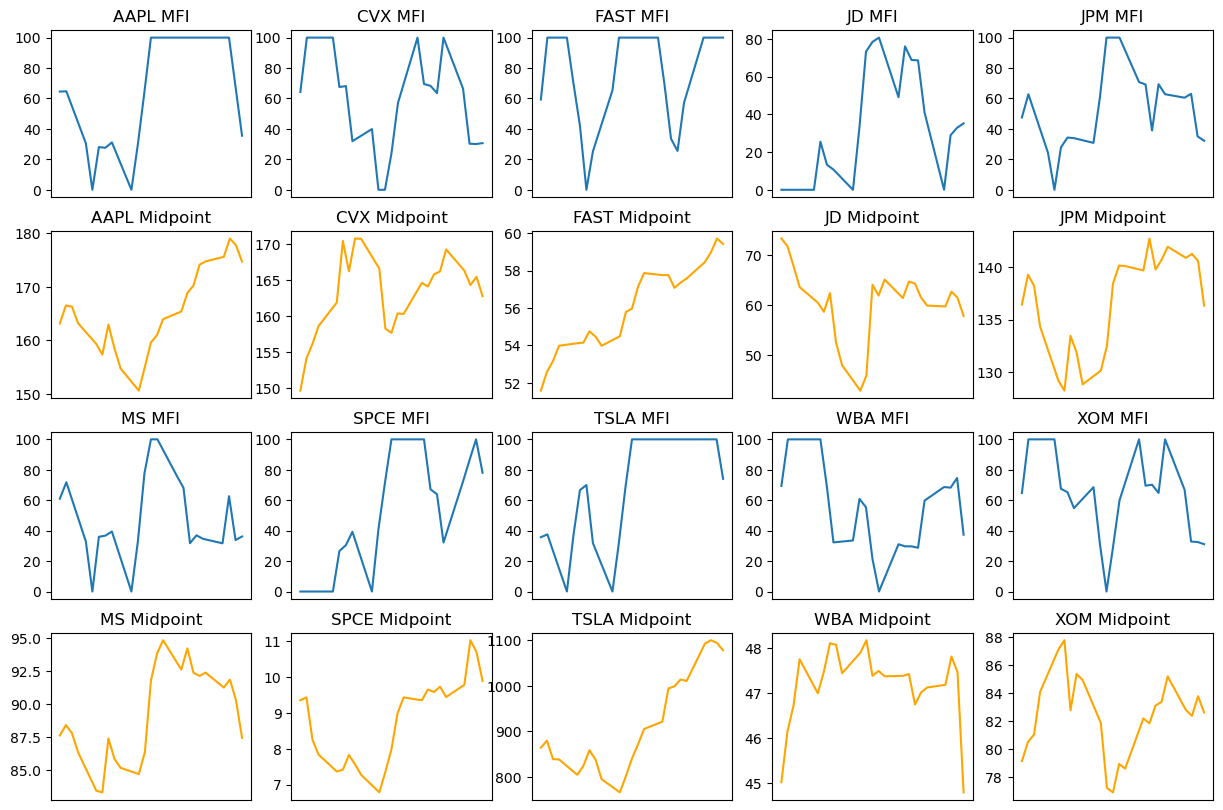

In [14]:
stocks = list(df['symbol'].unique())
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
lookback = 3
i = 0

for symbol, data in df_sorted.groupby('symbol'):
    data['date'] = data['datetime'].dt.date
    daily_data = data.groupby('date').agg(
        high=('midpoint', 'max'),
        low=('midpoint', 'min'),
        close=('midpoint', lambda x: x.iloc[-1]),
        total_volume=('volume', 'sum')                   
    ).reset_index()

    daily_data['typical_price'] = (daily_data['high'] + daily_data['low'] + daily_data['close'])/3
    daily_data['raw_money_flow'] = daily_data['typical_price'] * daily_data['total_volume']
    daily_data['money_flow_sign'] = np.where(daily_data['typical_price'] > daily_data['typical_price'].shift(1), 1, -1) 

    daily_data['signed_flow'] = daily_data['raw_money_flow'] * daily_data['money_flow_sign']

    daily_data['positive_money_flow'] = np.where(daily_data['signed_flow'] > 0, daily_data['signed_flow'], 0)
    daily_data['negative_money_flow'] = np.where(daily_data['signed_flow'] < 0, abs(daily_data['signed_flow']), 0)

    daily_data['money_flow_gain'] = daily_data['positive_money_flow'].rolling(lookback).sum()
    daily_data['money_flow_loss'] = daily_data['negative_money_flow'].rolling(lookback).sum()
    daily_data['money_flow_ratio'] =  daily_data['money_flow_gain']/daily_data['money_flow_loss']

    daily_data['money_flow_index'] = (100 - 100 / (1 + daily_data['money_flow_ratio']))

    mfi_values = daily_data['money_flow_index']
    x = daily_data['date']
    price = daily_data['close']
    
    if i < 5:
        axs[0, i].plot(x, mfi_values, label="MFI")
        axs[0, i].set_title(symbol + " MFI")
        axs[0, i].set_xticks([])

        axs[1, i].plot(x, price, color='orange')
        axs[1, i].set_xticks([])
        axs[1, i].set_title(symbol + " Midpoint")
    else:
        axs[2, i%5].plot(x, mfi_values, label="MFI")
        axs[2, i%5].set_title(symbol + " MFI")
        axs[2, i%5].set_xticks([])

        axs[3, i%5].plot(x, price, color='orange')
        axs[3, i%5].set_xticks([])
        axs[3, i%5].set_title(symbol + " Midpoint")
    i += 1

The money flow index (MFI) can be interpreted as follows: an MFI over 80 may indicate that the stock is overbought, whereas an MFI below 20 may indicate that the stock is oversold. These thresholds can be modified and indicate potential price changes when a stock is oversold/overbought. If the MFI and price of the stock diverge, the price of the stock may also start to change in the direction of the MFI.